In [192]:
import sympy as sp
import numpy as np
import scipy
from matplotlib import pyplot as plt
sp.init_printing()

### Defining the symbols

In [193]:
x,y,r,m,g,t = sp.symbols('x,y,r,m,g,t')

### Defining the Functions

In [194]:
theta = sp.Function(r'\theta')
theta = theta(t)
theta_d = sp.diff(theta, t)
theta_dd = sp.diff(theta_d, t)

### Defining the Generalised coordinates

In [195]:
x = r*sp.cos(theta)
y = r*sp.sin(theta)
xd = sp.diff(x, t)
yd = sp.diff(y, t)

### Defining the Lagrangian

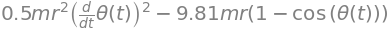

In [202]:
T = 1/2*m*(xd**2 + yd**2)
T = sp.simplify(T)
V = m*g*r*(1-sp.cos(theta))
V
L = sp.Function('L')
L = T-V
L

### Finding the Euler-Lagrange Equations

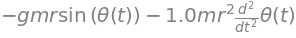

In [197]:
EL = sp.diff(L, theta) - sp.diff(sp.diff(L, theta_d), t).simplify()
EL

### Equation of Motion

In [198]:
sols = sp.solve(EL, theta_dd)
sols

### Numerical solution to the ODE using odeint from scipy

In [220]:
def dSdt(S, t):
    theta1, omega = S
    return [omega,
            -g*np.sin(theta1)]
g = 9.81
theta0 = np.pi/4
omega0 = 0
S0 = (theta0, omega0)

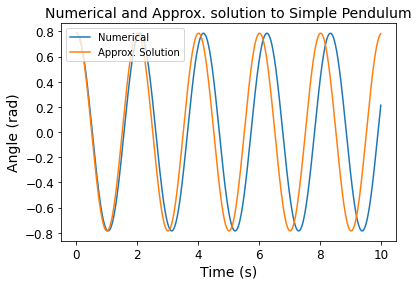

In [223]:
t = np.linspace(0, 10, 10000)
sol = odeint(dSdt, S0, t)
theta1, omega = sol.T
w = np.sqrt(g)
theta2 = theta0*np.cos(w*t)
plt.plot(t, theta1, label='Numerical')
plt.plot(t, theta2, label='Approx. Solution')
plt.title('Numerical and Approx. solution to Simple Pendulum', fontsize = 14)
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Angle (rad)', fontsize=14)
plt.legend(loc = 'upper left')
plt.tick_params(axis = 'both', labelsize=12)
plt.show()